#  Downloading data

In [1]:
import pandas as pd
import numpy as np
import random

%matplotlib inline
random.seed(a=None, version=2)

pd.set_option('display.max_columns',24)
pd.set_option('display.max_rows',6000)
colNames=['target','1.cap-shape', '2.cap-surface', '3.cap-color', '4.bruises', '5.odor', '6.gill-attachment',
          '7.gill-spacing', '8.gill-size', '9.gill-color', '10.stalk-shape', '11.stalk-root', 
          '12.stalk-surface-above-ring', '13.stalk-surface-below-ring', '14.stalk-color-above-ring',
          '15.stalk-color-below-ring', '16.veil-type', '17.veil-color', '18.ring-number', '19.ring-type',
          '20.spore-print-color', '21.population','22.habitat']
mushroom_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
            names=colNames)



In [2]:
mushroom_data.head()

,target,1.cap-shape,2.cap-surface,3.cap-color,4.bruises,5.odor,6.gill-attachment,7.gill-spacing,8.gill-size,9.gill-color,10.stalk-shape,11.stalk-root,12.stalk-surface-above-ring,13.stalk-surface-below-ring,14.stalk-color-above-ring,15.stalk-color-below-ring,16.veil-type,17.veil-color,18.ring-number,19.ring-type,20.spore-print-color,21.population,22.habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
#print(mushroom_data)

In [4]:
mushroom_data.mode()

,target,1.cap-shape,2.cap-surface,3.cap-color,4.bruises,5.odor,6.gill-attachment,7.gill-spacing,8.gill-size,9.gill-color,10.stalk-shape,11.stalk-root,12.stalk-surface-above-ring,13.stalk-surface-below-ring,14.stalk-color-above-ring,15.stalk-color-below-ring,16.veil-type,17.veil-color,18.ring-number,19.ring-type,20.spore-print-color,21.population,22.habitat
0,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d


## Data preprocessing

In [5]:
#W naszych danych jedynie kolumna 11 zawiera brakujace dane(wystepuje jako '?'), mozemy:
#1.Zastapic je najczesciej wystepujaca wartoscia w kolumnie 11
#2.Wyrzucic wszystkie wiersze z brakujacymi danymi
mushroom_data1 = mushroom_data.copy()
mushroom_data2 = mushroom_data.copy()
#najczesciej wystepujaca wartosc w kolumnie 11
mode_value = mushroom_data.mode().iloc[:,11]
#zastepujemy brakujace wartosci wartoscia najczesciej wystepujaca
mushroom_data1.replace("?", np.nan, inplace=True)
mushroom_data1.replace(np.nan, mode_value[0], inplace=True)
#drugie podejscie usuwamy wiersze zawierajace brakujace dane
mushroom_data2.replace("?", np.nan, inplace=True)
mushroom_data2.dropna(inplace=True)
#zamieniamy wartości tekstowe na liczbowe
mushroom_data1 = mushroom_data1.apply(lambda x: pd.factorize(x, sort=True)[0])
mushroom_data2 = mushroom_data2.apply(lambda x: pd.factorize(x, sort=True)[0])
#wydzielamy dane o jadalnosci od pozostalych
mushroom_x1 = mushroom_data1.iloc[:, 1:23]
mushroom_y1 = mushroom_data1.iloc[:, 0]
mushroom_x2 = mushroom_data2.iloc[:, 1:23]
mushroom_y2 = mushroom_data2.iloc[:, 0]

## Train-test split

In [36]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = \
    train_test_split(mushroom_x1, mushroom_y1, train_size=0.8, random_state=67)
x_train2, x_test2, y_train2, y_test2 = \
    train_test_split(mushroom_x2, mushroom_y2, train_size=0.8, random_state=67)

C:\Users\Piotr\Anaconda3\envs\kwd\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Training of models

In [37]:
from sklearn import tree

filled_data_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=37)
dropped_data_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=37)
filled_data_model.fit(x_train1, y_train1)
dropped_data_model.fit(x_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

## Model scores 

In [38]:
#wynik modelu danych uzupelnionych na swoich danych testowych
filled_data_model.score(x_test1, y_test1)

1.0

In [39]:
#wynik modelu danych uzupelnionych na swoich danych treningowych
filled_data_model.score(x_train1, y_train1)

1.0

In [40]:
#wynik modelu danych uzupelnionych na danych testowych drugiego modelu
filled_data_model.score(x_test2, y_test2)

0.8423383525243578

In [41]:
#wynik modelu danych uzupelnionych na danych treningowych drugiego modelu
filled_data_model.score(x_train2, y_train2)

0.8445182724252491

In [42]:
#wynik modelu danych usunietych na swoich danych testowych
dropped_data_model.score(x_test2, y_test2)

1.0

In [43]:
#wynik modelu danych usunietych na swoich danych treningowych
dropped_data_model.score(x_train2, y_train2)

1.0

In [44]:
#wynik modelu danych usunietych na danych testowych drugiego modelu
dropped_data_model.score(x_test1, y_test1)

0.5655384615384615

In [45]:
#wynik modelu danych usunietych na danych treningowych drugiego modelu
dropped_data_model.score(x_train1, y_train1)

0.5473149715340822

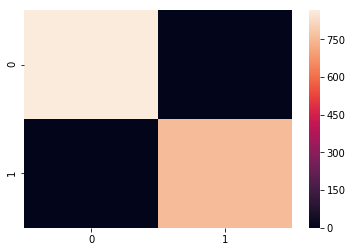

In [46]:
#Macierz konfuzji modelu o uzupelnionych danych
from sklearn.metrics import confusion_matrix
import seaborn as sn

filled_data_predictions = filled_data_model.predict(x_test1)
filled_data_cnf_matrix = confusion_matrix(y_test1, filled_data_predictions)
sn.heatmap(filled_data_cnf_matrix)


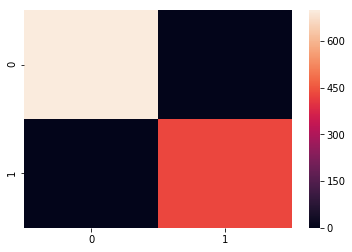

In [47]:
#Macierz konfuzji modelu o uzupelnionych danych
dropped_data_predictions = dropped_data_model.predict(x_test2)
dropped_data_cnf_matrix = confusion_matrix(y_test2, dropped_data_predictions)
sn.heatmap(dropped_data_cnf_matrix)


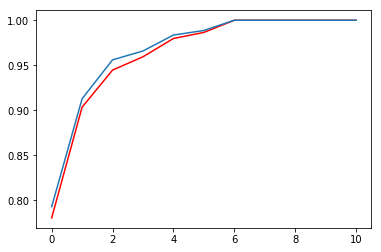

In [49]:
#wykres wyników modelu z uzupelnionymi danymi w zaleznosci od glebokosci drzewa
import matplotlib.pyplot as plt

test_scores1 = []
train_scores1 = []
for i in range(1, 12):
    graph1 = tree.DecisionTreeClassifier(criterion='entropy', random_state=111, max_depth=i)
    graph1.fit(x_train1, y_train1)
    test_scores1.append(graph1.score(x_test1, y_test1))
    train_scores1.append(graph1.score(x_train1, y_train1))

plt.plot(test_scores1, color='red')
plt.plot(train_scores1)
plt.show()

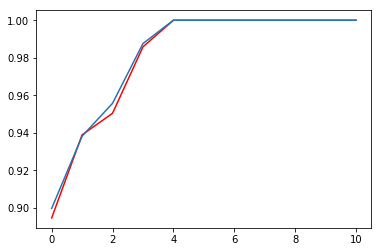

In [50]:
#wykres wyników modelu z usunietymi danymi w zaleznosci od glebokosci drzewa
test_scores2 = []
train_scores2 = []
for i in range(1, 12):
    graph2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=111, max_depth=i)
    graph2.fit(x_train2, y_train2)
    test_scores2.append(graph2.score(x_test2, y_test2))
    train_scores2.append(graph2.score(x_train2, y_train2))

plt.plot(test_scores2, color='red')
plt.plot(train_scores2)
plt.show()

In [51]:
#wizualizacje drzew
import graphviz

tree_filled = tree.export_graphviz(filled_data_model, out_file=None)
filled_graph = graphviz.Source(tree_filled)
filled_graph.render("Filled data model")

tree_dropped = tree.export_graphviz(dropped_data_model, out_file=None)
dropped_graph = graphviz.Source(tree_dropped)
dropped_graph.render("Dropped data model")

'Dropped data model.pdf'